### Estimate sheet inductance for resonators of the TAHP02 design

In [1]:
from pathlib import Path

import pandas as pd

from betata import plt, get_blues
from betata.resonator_studies.resonator import load_resonators, map_ls_to_lk, save_resonator

CWD = Path.cwd()

Load design data file

In [2]:
design_name = "TAHP02"
design_filepath = CWD / f"data/resonator_studies/{design_name}_lk_sim.csv"
dataframe = pd.read_csv(design_filepath)

Load resonators

In [3]:
resonators = load_resonators()

Map kinetic inductance to sheet inductance

In [4]:
result = map_ls_to_lk(dataframe)
pitch_nsq_map = {}

----------------------------------------------------------------------------------------------------
2 um
[[Model]]
    Model(fit_fn)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 18
    # variables        = 1
    chi-square         = 0.89003942
    reduced chi-square = 0.05235526
    Akaike info crit   = -52.1235032
    Bayesian info crit = -51.2331314
    R-squared          = 0.99339601
[[Variables]]
    nsq:  502.724962 +/- 5.12281544 (1.02%) (init = 50)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
4 um
[[Model]]
    Model(fit_fn)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 18
    # variables        = 1
    chi-square         = 0.31669538
    reduced chi-square = 0.01862914
    Akaike info crit   = -70.7233602
  

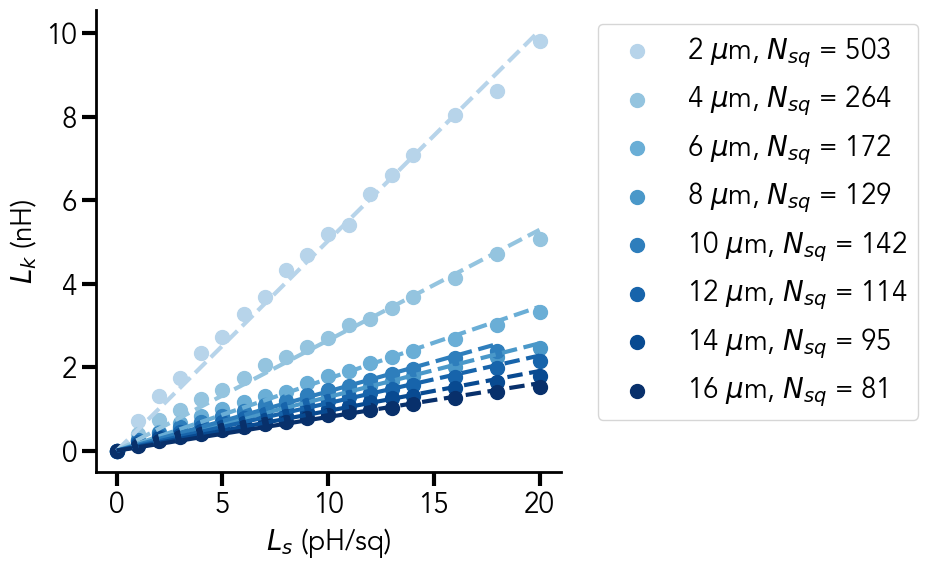

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
blues = get_blues(len(result.keys()), start=0.3, stop=1.0)

for idx, (pitch, (l_sheet, l_kin, fit_result)) in enumerate(result.items()):

    print("-"*100)
    print(f"{pitch} um")
    print(fit_result.fit_report())
    print("-"*100)

    ax.plot(l_sheet, fit_result.best_fit, "--", color=blues[idx])
    N_sq = fit_result.best_values["nsq"]
    N_sq_err = fit_result.params["nsq"].stderr
    label = f"{pitch} " + r"$\mu$m, $N_{sq}$" + f" = {N_sq:.0f}"
    ax.scatter(l_sheet, l_kin, label=label, color=blues[idx])

    pitch_nsq_map[pitch] = (N_sq, N_sq_err)

ax.set_xlabel(r"$L_s$ (pH/sq)")
ax.set_ylabel(r"$L_k$ (nH)")
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Save N_sq in resonator data file

In [6]:
for resonator in resonators:
    if design_name == resonator.design_name:
        pitch = int(resonator.pitch * 1e6)
        resonator.N_sq, resonator.N_sq_err = pitch_nsq_map[pitch]
        save_resonator(resonator)